In [221]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [222]:
# Read in White wine dataset (note file is semi-colon delimited)

White_Wine_df=pd.read_csv("winequality-white.csv",engine='python', delimiter='\;')
White_Wine_df.head(10)

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [223]:
# Read in Red wine dataset (note file is semi-colon delimited)

Red_Wine_df=pd.read_csv("winequality-red.csv",engine='python', delimiter='\;')
Red_Wine_df.head(10)

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [224]:
White_Wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   "fixed acidity"         4898 non-null   float64
 1   "volatile acidity"      4898 non-null   float64
 2   "citric acid"           4898 non-null   float64
 3   "residual sugar"        4898 non-null   float64
 4   "chlorides"             4898 non-null   float64
 5   "free sulfur dioxide"   4898 non-null   float64
 6   "total sulfur dioxide"  4898 non-null   float64
 7   "density"               4898 non-null   float64
 8   "pH"                    4898 non-null   float64
 9   "sulphates"             4898 non-null   float64
 10  "alcohol"               4898 non-null   float64
 11  "quality"               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [225]:
Red_Wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   "fixed acidity"         1599 non-null   float64
 1   "volatile acidity"      1599 non-null   float64
 2   "citric acid"           1599 non-null   float64
 3   "residual sugar"        1599 non-null   float64
 4   "chlorides"             1599 non-null   float64
 5   "free sulfur dioxide"   1599 non-null   float64
 6   "total sulfur dioxide"  1599 non-null   float64
 7   "density"               1599 non-null   float64
 8   "pH"                    1599 non-null   float64
 9   "sulphates"             1599 non-null   float64
 10  "alcohol"               1599 non-null   float64
 11  "quality"               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [226]:
#Rename columns (remove "" and space in names)

White_Wine_Rename_df=White_Wine_df.rename({'"fixed acidity"':'fixed_acidity',
                                           '"volatile acidity"':'volatile_acidity',
                                            '"citric acid"':'citric_acid',
                                           '"residual sugar"':'residual_sugar',
                                           '"chlorides"':'chlorides',
                                           '"free sulfur dioxide"':'free_sulfur_dioxide',
                                           '"total sulfur dioxide"':'total_sulfur_dioxide', 
                                           '"density"':'density',
                                           '"pH"':'pH',
                                          '"sulphates"':'sulphates',
                                          '"alcohol"':'alcohol',
                                          '"quality"':'quality'}, axis="columns") 


White_Wine_Rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [227]:
#Rename columns (remove "" and space in names)

Red_Wine_Rename_df=Red_Wine_df.rename({'"fixed acidity"':'fixed_acidity',
                                           '"volatile acidity"':'volatile_acidity',
                                            '"citric acid"':'citric_acid',
                                           '"residual sugar"':'residual_sugar',
                                           '"chlorides"':'chlorides',
                                           '"free sulfur dioxide"':'free_sulfur_dioxide',
                                           '"total sulfur dioxide"':'total_sulfur_dioxide', 
                                           '"density"':'density',
                                           '"pH"':'pH',
                                          '"sulphates"':'sulphates',
                                          '"alcohol"':'alcohol',
                                          '"quality"':'quality'}, axis="columns") 


Red_Wine_Rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [228]:
#check for null values

White_Wine_Rename_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [229]:
#check for null values

Red_Wine_Rename_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [230]:
#add column Wine Type

White_Wine_Rename_df.insert(0, "Wine_Type", "White", True)
White_Wine_Rename_df

,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [231]:
#add column Wine Type

Red_Wine_Rename_df.insert(0, "Wine_Type", "Red", True)
Red_Wine_Rename_df

,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,Red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,Red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,Red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [232]:
# concatenate cleaned red and white dataframes

White_Red_Concat_df=pd.concat([White_Wine_Rename_df,Red_Wine_Rename_df])
White_Red_Concat_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine_Type             6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [233]:
White_Red_Concat_df.head(10)

,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,White,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,White,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [234]:
White_Red_Concat_df.tail(10)

,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1589,Red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,Red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,Red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,Red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,Red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [235]:
# Save concatenated file to CSV

White_Red_Concat_df.to_csv('wine_qaulity_White_Red_Concat.csv')

In [236]:
Red_Wine_Rename_df.shape 

(1599, 13)

In [237]:
White_Wine_Rename_df.shape 

(4898, 13)

In [238]:
# explore removing outliers (White Wine)

# IQR Method (note uses muliplier of 3 to remove extreme outliers, 1.5 removed too many samples from the dataset)

Q1w=White_Wine_Rename_df.quantile(0.25)
Q3w=White_Wine_Rename_df.quantile(0.75)
IQRw=Q3-Q1
lower_boundw=Q1 - 3 * IQR
upper_boundw=Q3 + 3 * IQR

lower_boundw,upper_boundw

(fixed_acidity            0.800000
 volatile_acidity        -0.360000
 citric_acid             -0.900000
 residual_sugar          -0.200000
 chlorides                0.010000
 free_sulfur_dioxide    -35.000000
 total_sulfur_dioxide   -98.000000
 density                  0.988895
 pH                       2.640000
 sulphates                0.010000
 alcohol                  4.700000
 quality                  2.000000
 dtype: float64,
 fixed_acidity            15.50000
 volatile_acidity          1.39000
 citric_acid               1.41000
 residual_sugar            4.70000
 chlorides                 0.15000
 free_sulfur_dioxide      63.00000
 total_sulfur_dioxide    182.00000
 density                   1.00454
 pH                        3.97000
 sulphates                 1.27000
 alcohol                  15.90000
 quality                   9.00000
 dtype: float64)

In [239]:
# explore removing outliers (Red Wine)

# IQR Method (note uses muliplier of 3 to remove extreme outliers, 1.5 removed too many samples from the dataset)

Q1r=Red_Wine_Rename_df.quantile(0.25)
Q3r=Red_Wine_Rename_df.quantile(0.75)
IQRr=Q3-Q1
lower_boundr=Q1 - 3 * IQR
upper_boundr=Q3 + 3 * IQR

lower_boundr,upper_boundr




(fixed_acidity            0.800000
 volatile_acidity        -0.360000
 citric_acid             -0.900000
 residual_sugar          -0.200000
 chlorides                0.010000
 free_sulfur_dioxide    -35.000000
 total_sulfur_dioxide   -98.000000
 density                  0.988895
 pH                       2.640000
 sulphates                0.010000
 alcohol                  4.700000
 quality                  2.000000
 dtype: float64,
 fixed_acidity            15.50000
 volatile_acidity          1.39000
 citric_acid               1.41000
 residual_sugar            4.70000
 chlorides                 0.15000
 free_sulfur_dioxide      63.00000
 total_sulfur_dioxide    182.00000
 density                   1.00454
 pH                        3.97000
 sulphates                 1.27000
 alcohol                  15.90000
 quality                   9.00000
 dtype: float64)

In [240]:
IQR_White_Wine_Rename_df = White_Wine_Rename_df[~((White_Wine_Rename_df < lower_boundw) |(White_Wine_Rename_df > upper_boundw)).any(axis=1)]
IQR_White_Wine_Rename_df.shape  

C:\Users\KGaynor\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(2028, 13)

In [241]:
IQR_Red_Wine_Rename_df = Red_Wine_Rename_df[~((Red_Wine_Rename_df < lowqe_bound) |(Red_Wine_Rename_df > upper_bound)).any(axis=1)]
IQR_Red_Wine_Rename_df.shape   

C:\Users\KGaynor\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(1396, 13)

In [242]:
# concatenate cleaned red and white dataframes with outliers removed

IQR_White_Red_Concat_df=pd.concat([IQR_White_Wine_Rename_df,IQR_Red_Wine_Rename_df])
White_Red_Concat_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine_Type             6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [243]:
# Save concatenated file to CSV

IQR_White_Red_Concat_df.to_csv('wine_qaulity_White_Red_Concat_remove_outliers.csv')

In [ ]:
# Plot parameters

In [246]:
#Check correlation of parameters on data set with removed outliers
#possibly drop columns that are highly correlated before creating model

IQR_White_Wine_Rename_df.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.073092,0.315920,-0.057742,0.060890,-0.109875,0.056087,0.391104,-0.479947,-0.040795,-0.132997,-0.176847
volatile_acidity,-0.073092,1.000000,-0.322568,0.172645,0.028502,-0.167717,0.024323,-0.038563,-0.031569,-0.093404,0.101146,-0.167039
citric_acid,0.315920,-0.322568,1.000000,-0.077620,0.132362,0.027268,0.084175,0.072737,-0.128994,0.052351,0.039363,0.050987
residual_sugar,-0.057742,0.172645,-0.077620,1.000000,-0.071890,0.056220,0.068983,0.041678,-0.031108,-0.018206,0.197102,0.171857
chlorides,0.060890,0.028502,0.132362,-0.071890,1.000000,0.033547,0.220811,0.398435,-0.058516,0.001363,-0.426086,-0.225947
free_sulfur_dioxide,-0.109875,-0.167717,0.027268,0.056220,0.033547,1.000000,0.463881,-0.096722,0.106172,0.050378,0.071050,0.298621
total_sulfur_dioxide,0.056087,0.024323,0.084175,0.068983,0.220811,0.463881,1.000000,0.280328,0.094170,0.081502,-0.172018,0.024016
density,0.391104,-0.038563,0.072737,0.041678,0.398435,-0.096722,0.280328,1.000000,0.081112,0.112069,-0.819268,-0.401801
pH,-0.479947,-0.031569,-0.128994,-0.031108,-0.058516,0.106172,0.094170,0.081112,1.000000,0.173860,0.039657,0.176849
sulphates,-0.040795,-0.093404,0.052351,-0.018206,0.001363,0.050378,0.081502,0.112069,0.173860,1.000000,0.032792,0.139602


In [247]:
# Check correlation of parameters on data set with removed outliers
#possibly drop columns that are highly correlated before creating model

IQR_Red_Wine_Rename_df.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.286335,0.697818,0.235424,0.222202,-0.151664,-0.094108,0.668071,-0.697338,0.215995,-0.026503,0.146986
volatile_acidity,-0.286335,1.000000,-0.588575,0.027401,0.094002,0.004538,0.121817,-0.012431,0.237389,-0.333478,-0.193990,-0.373802
citric_acid,0.697818,-0.588575,1.000000,0.165824,0.122881,-0.075937,0.004424,0.373861,-0.519700,0.294942,0.150749,0.250555
residual_sugar,0.235424,0.027401,0.165824,1.000000,0.243940,0.031497,0.096114,0.370806,-0.104741,0.044478,0.129581,0.014716
chlorides,0.222202,0.094002,0.122881,0.243940,1.000000,0.011645,0.137359,0.378241,-0.202618,-0.015363,-0.206431,-0.140554
free_sulfur_dioxide,-0.151664,0.004538,-0.075937,0.031497,0.011645,1.000000,0.652210,-0.043104,0.105370,0.058253,-0.076822,-0.056133
total_sulfur_dioxide,-0.094108,0.121817,0.004424,0.096114,0.137359,0.652210,1.000000,0.119712,-0.025461,-0.043730,-0.272407,-0.240813
density,0.668071,-0.012431,0.373861,0.370806,0.378241,-0.043104,0.119712,1.000000,-0.312388,0.143969,-0.472871,-0.166338
pH,-0.697338,0.237389,-0.519700,-0.104741,-0.202618,0.105370,-0.025461,-0.312388,1.000000,-0.048788,0.156038,-0.075076
sulphates,0.215995,-0.333478,0.294942,0.044478,-0.015363,0.058253,-0.043730,0.143969,-0.048788,1.000000,0.231058,0.386383


In [257]:
# Check wine quality ratings for red and white wines (in family dataset)

X = IQR_White_Red_Concat_df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = IQR_White_Red_Concat_df['quality']

IQR_White_Red_Concat_df.groupby(["Wine_Type","quality"])["quality"].count()

Wine_Type  quality
Red        4           48
           5          601
           6          566
           7          168
           8           13
White      3            8
           4           90
           5          473
           6          905
           7          466
           8           82
           9            4
Name: quality, dtype: int64

In [261]:
#plot white wine parameters (in family dataset)


fixed_acidity = IQR_White_Wine_Rename_df["fixed_acidity"]
volatile_acidity = IQR_White_Wine_Rename_df["volatile_acidity"]
citric_acid = IQR_White_Wine_Rename_df["citric_acid"]
residual_sugar = IQR_White_Wine_Rename_df["residual_sugar"]
chlorides = IQR_White_Wine_Rename_df["chlorides"]                                         
free_sulfur_dioxide = IQR_White_Wine_Rename_df["free_sulfur_dioxide"]
total_sulfur_dioxide = IQR_White_Wine_Rename_df["total_sulfur_dioxide"]
density = IQR_White_Wine_Rename_df["density"]                                       
pH = IQR_White_Wine_Rename_df["pH"]
sulphates = IQR_White_Wine_Rename_df["sulphates"]                                        
alcohol = IQR_White_Wine_Rename_df["alcohol"]





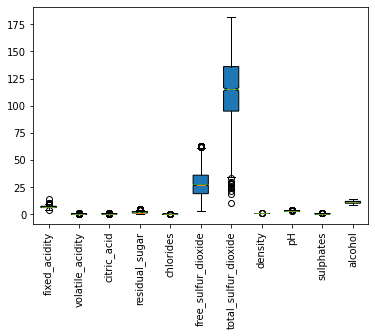

In [273]:
# box plots

fig, ax = plt.subplots()

columns = [fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,pH,sulphates,alcohol]
ax.boxplot(columns,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide","density","pH","sulphates","alcohol"], rotation=90)

plt.show()

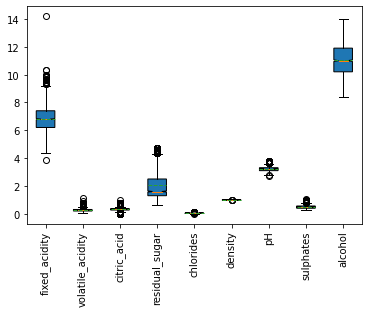

In [274]:
#box plots remove free and total dioxides (largest spread)

fig, ax = plt.subplots()

columns = [fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides, density,pH,sulphates,alcohol]
ax.boxplot(columns,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9], ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","density","pH","sulphates","alcohol"], rotation=90)

plt.show()

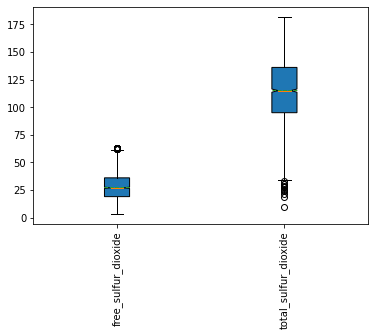

In [275]:
#box plots remove free and total dioxides (largest spread)

fig, ax = plt.subplots()

columns = [free_sulfur_dioxide, total_sulfur_dioxide]
ax.boxplot(columns,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2], ["free_sulfur_dioxide", "total_sulfur_dioxide"], rotation=90)

plt.show()